<a href="https://colab.research.google.com/github/oas95/deep-learning-challenge/blob/main/Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../deep-learning-challenge/Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [13]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
appclean_dfv1 = application_df.drop(['EIN', 'STATUS'], axis=1)

In [14]:
appclean_dfv1.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [15]:
appclean_dfv1.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [16]:
# Determine the number of unique values in each column.
for i in appclean_dfv1.columns:
  print(i, len(appclean_dfv1[i].unique()))

NAME 19568
APPLICATION_TYPE 17
AFFILIATION 6
CLASSIFICATION 71
USE_CASE 5
ORGANIZATION 4
INCOME_AMT 9
SPECIAL_CONSIDERATIONS 2
ASK_AMT 8747
IS_SUCCESSFUL 2


In [17]:
# Look at Name counts value counts for binning
name_counts = appclean_dfv1['NAME'].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [18]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
names_to_replace = list(name_counts[name_counts<100].index)

# Replace in dataframe
for name in names_to_replace:
    appclean_dfv1['NAME'] = appclean_dfv1['NAME'].replace(name,"Other")

# Check to make sure binning was successful
appclean_dfv1['NAME'].value_counts()

Other                                                                 25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [23]:
# Look at APPLICATION_TYPR value counts for binning
applications_counts = appclean_dfv1['APPLICATION_TYPE'].value_counts()
applications_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [24]:
# Turn application value counts into dictionary
# Choose a cutoff value and create a list of application types to be replaced
# Use list comprehension to identify applications with counts of less than 200
# use the variable name `application_types_to_replace`
application_counts_dict = applications_counts.to_dict()
application_types_to_replace = [key for key,value in application_counts_dict.items() if int(value)<700]
application_types_to_replace

['T10', 'T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [25]:
# Replace in dataframe
for app in application_types_to_replace:
    appclean_dfv1['APPLICATION_TYPE'] = appclean_dfv1['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
appclean_dfv1['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [27]:
# Look at CLASSIFICATION value counts for binning
classification_counts = appclean_dfv1["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [28]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [30]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    appclean_dfv1['CLASSIFICATION'] = appclean_dfv1['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
appclean_dfv1['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [31]:
import math
appclean_dfv1["ASK_AMT"] = appclean_dfv1["ASK_AMT"].map(lambda x: math.log(x))

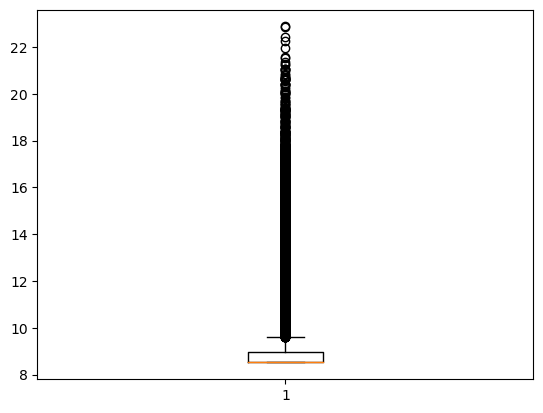

In [33]:
import matplotlib.pyplot as plt

# Checking for Outliers
ask_amount = list(appclean_dfv1["ASK_AMT"])
fig1, ax1 = plt.subplots()

ax1.boxplot(ask_amount)
plt.show()

In [34]:
import numpy as np
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(ask_amount,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = [time for time in ask_amount if time < lower_bound or time > upper_bound]
len(potential_outliers)

7975

In [35]:
# Look at INCOME_AMT value counts for binning
income_counts = appclean_dfv1["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [36]:
# Made income_counts into a dictionary to use to weed out incomes to be replaced
income_counts_dict = income_counts.to_dict()

# Choose a cutoff value and create a list of incomes to be replaced
# Use list comprehension to weed out incomes with counts less than 1000
# use the variable name `incomes_to_replace`
incomes_to_replace = [key for key,value in income_counts_dict.items() if int(value) < 500]
incomes_to_replace

['10M-50M', '5M-10M', '50M+']

In [37]:
# Replace in dataframe
for cls in incomes_to_replace:
    appclean_dfv1['INCOME_AMT'] = appclean_dfv1['INCOME_AMT'].replace(cls,"Other")
    
# Check to make sure binning was successful
appclean_dfv1['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
Other              564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [38]:
appclean_dfv1.head(3)

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Other,Independent,C1000,ProductDev,Association,0,N,8.517193,1
1,Other,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,11.595335,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0,N,8.517193,0


In [39]:
appclean_dfv1.columns

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'ASK_AMT',
       'IS_SUCCESSFUL'],
      dtype='object')

In [40]:
# Convert categorical data to numeric with `pd.get_dummies
app_dummies = pd.get_dummies(appclean_dfv1)

app_dummies.head()


,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,8.517193,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,11.595335,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,8.517193,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,8.808668,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,11.867729,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [12]:
# Split our preprocessed data into our features and target arrays
X = app_dummies.drop('IS_SUCCESSFUL', axis=1).values
y = app_dummies['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]

hidden_node1 = 80

hidden_node2 = 30

hidden_node3 = 30

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_node1, activation='relu', input_dim=input_features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_node2, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=hidden_node3, activation='relu'))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1569040   
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
Total params: 1,572,400
Trainable params: 1,572,400
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, validation_split=0.15, epochs=50)

Epoch 1/50
684/684 [==============================] - 10s 12ms/step - loss: 2.6692 - accuracy: 0.0135 - val_loss: 2.3359 - val_accuracy: 5.1827e-04
Epoch 2/50
684/684 [==============================] - 6s 8ms/step - loss: 1.4330 - accuracy: 0.0058 - val_loss: 2.3260 - val_accuracy: 7.7740e-04
Epoch 3/50
684/684 [==============================] - 6s 9ms/step - loss: 0.4937 - accuracy: 0.0065 - val_loss: 2.4694 - val_accuracy: 0.0016
Epoch 4/50
684/684 [==============================] - 6s 9ms/step - loss: 0.2116 - accuracy: 0.0573 - val_loss: 2.3553 - val_accuracy: 0.0054
Epoch 5/50
684/684 [==============================] - 6s 9ms/step - loss: 0.1669 - accuracy: 0.1263 - val_loss: 2.5373 - val_accuracy: 0.0083
Epoch 6/50
684/684 [==============================] - 7s 11ms/step - loss: 0.1448 - accuracy: 0.1536 - val_loss: 2.4860 - val_accuracy: 0.0137
Epoch 7/50
684/684 [==============================] - 7s 10ms/step - loss: 0.1371 - accuracy: 0.1723 - val_loss: 2.6371 - val_accuracy: 0

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 3s - loss: 0.7871 - accuracy: 0.1092 - 3s/epoch - 12ms/step
Loss: 0.7870756387710571, Accuracy: 0.10915452241897583


In [18]:
# Export our model to HDF5 file
nn_model.save('Models/AlphabetSoupCharity.h5')